In [46]:
# Data Visualization
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Misc.
from sklearn.preprocessing import LabelEncoder
from collections import Counter
df=pd.read_csv("predictive_maintenance[1].csv");
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [48]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


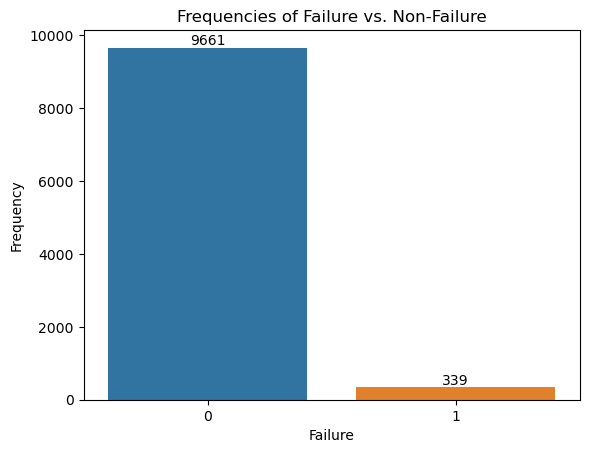

In [49]:
sns.countplot(x='Target', data=df)
plt.xlabel('Failure')
plt.ylabel('Frequency')
plt.title('Frequencies of Failure vs. Non-Failure')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom');
plt.show()



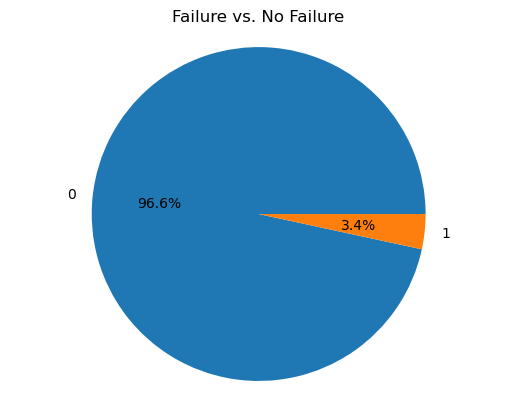

In [50]:
category_counts = df['Target'].value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Failure vs. No Failure')
plt.show()

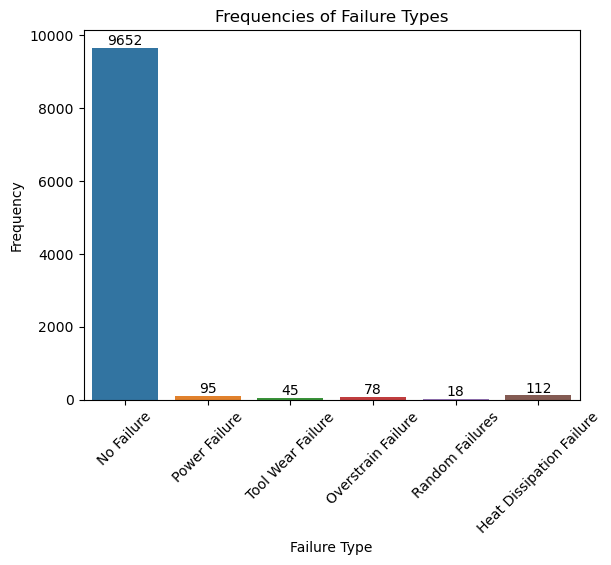

In [51]:
sns.countplot(x='Failure Type', data=df)
plt.xlabel('Failure Type')
plt.ylabel('Frequency')
plt.title('Frequencies of Failure Types')

plt.xticks(rotation=45)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),ha='center', va='bottom');
                

plt.show()

In [52]:
df.drop(df.columns[0:2], axis=1, inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


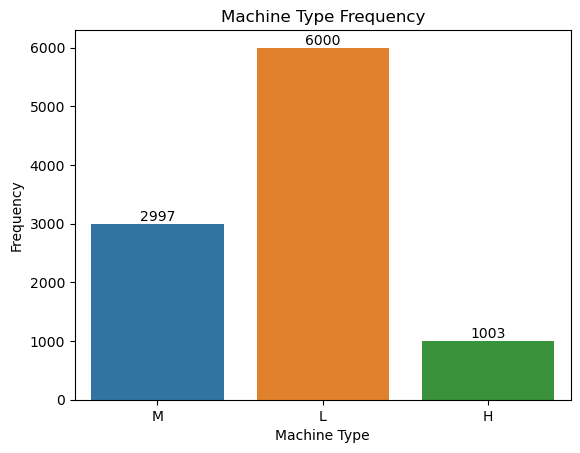

In [17]:
sns.countplot(x='Type', data=df)
plt.xlabel('Machine Type')
plt.ylabel('Frequency')
plt.title('Machine Type Frequency')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),ha='center', va='bottom');
                

plt.show()

In [90]:
from sklearn.model_selection import train_test_split
import category_encoders as ce
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [91]:
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df= encoder.fit_transform(df)
encode=LabelEncoder()
df.loc[:,df.columns[-1]]=encode.fit_transform(df.loc[:,df.columns[-1]])
encode.classes_

array([1, 2, 3, 4, 5, 6])

In [99]:
X = df.drop(columns="Failure Type" , axis=1)
y = df["Failure Type"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
data = pd.get_dummies(df,drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)
X_test.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
9953,2,298.1,307.8,1565,35.3,119,0
3850,1,302.3,311.0,1421,41.3,182,0
4962,1,304.0,312.7,1456,51.2,160,0
3886,2,302.4,311.3,1392,50.5,51,0
5437,1,302.9,312.6,1394,46.4,82,0


In [100]:
data_train = df.drop(df.columns[-3], axis=1)
data_train_val = data_train.values
smk = SMOTETomek(random_state=42)
X_res, y_res = smk.fit_resample(data_train_val,y)
X_res.shape,y_res.shape
print(f"Orignal Dataset Shape {Counter(y)}")
print(f"Resampled Dataset Shape {Counter(y_res)}")

Orignal Dataset Shape Counter({0: 9652, 5: 112, 1: 95, 3: 78, 2: 45, 4: 18})
Resampled Dataset Shape Counter({3: 9652, 4: 9652, 5: 9652, 2: 9651, 1: 9648, 0: 9647})


In [101]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Random Forest Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 99.65 %
--------------------------------------------------------
Random Forest Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1933
           1       0.95      0.95      0.95        22
           2       1.00      1.00      1.00         7
           3       0.93      0.93      0.93        14
           4       0.00      0.00      0.00         5
           5       1.00      1.00      1.00        19

    accuracy                           1.00      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.99      1.00      1.00      2000

--------------------------------------------------------


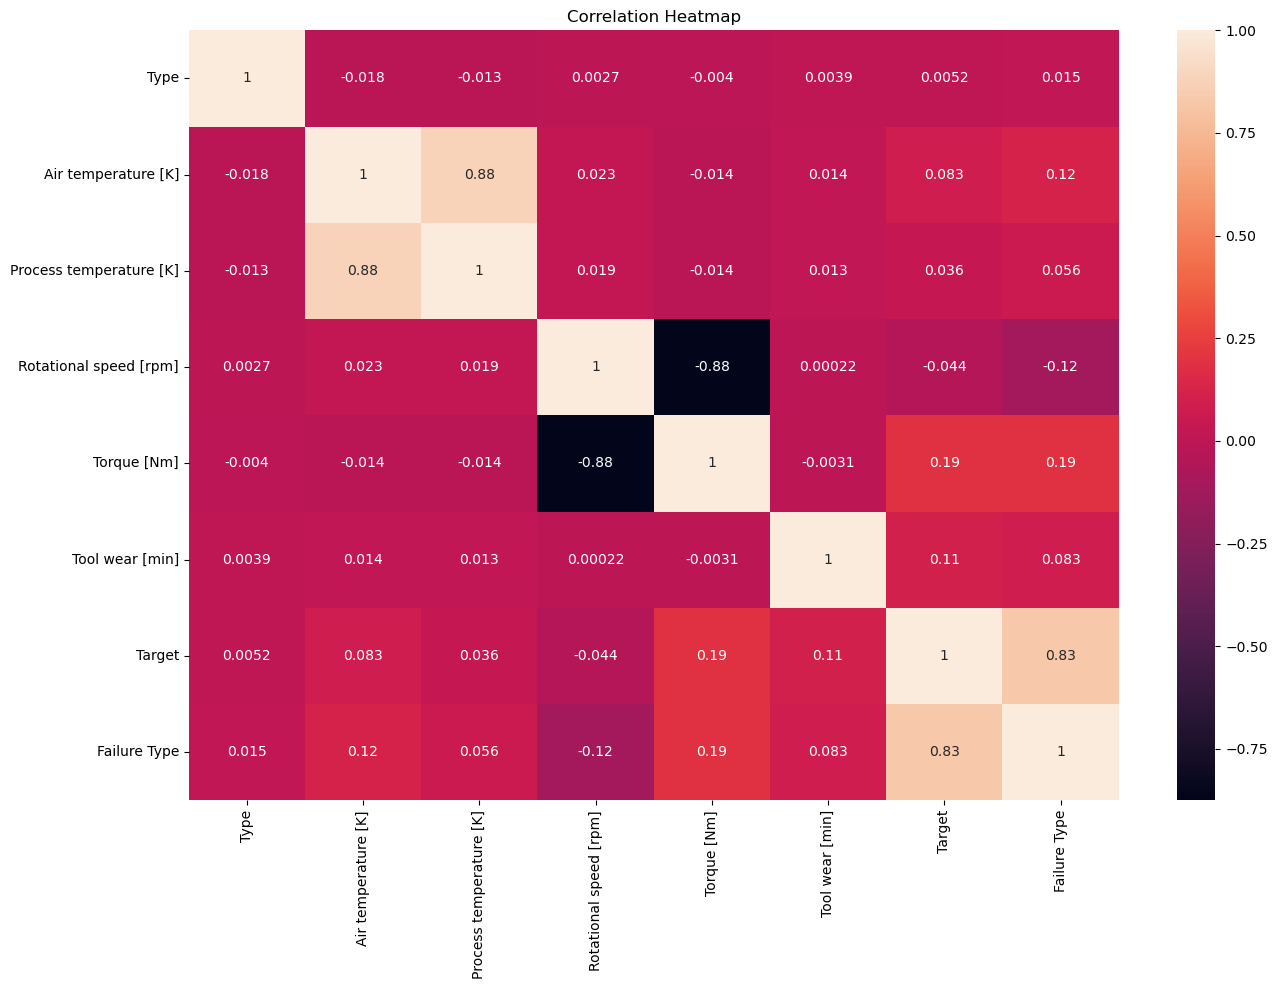

In [102]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data=data.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [103]:
#predictive analysis complete